In [3]:
from tensorflow import keras
from keras.layers import Dense,MaxPool2D,Conv2D,Flatten,Dropout,MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from keras.layers import Dropout
model = Sequential()

# CONV_1: add CONV layer with RELU activation and depth = 32 kernels
model.add(Conv2D(32, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1) ,name='conv_1'))
# POOL_1: downsample the image to choose the best features 
model.add(MaxPooling2D(pool_size=(2, 2),name='pool_1'))

# CONV_2: here we increase the depth to 64
model.add(Conv2D(64, (3, 3),padding='same', activation='relu',name='conv_2'))
# POOL_2: more downsampling
model.add(MaxPooling2D(pool_size=(2, 2) ))

# flatten since too many dimensions, we only want a classification output
model.add(Flatten(name='flatten'))

# FC_1: fully connected to get all relevant data
model.add(Dense(64, activation='relu',name='fc_1'))

# FC_2: output a softmax to squash the matrix into output probabilities for the 10 classes
model.add(Dense(10, activation='softmax',name='fc_2'))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 32)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 fc_1 (Dense)                (None, 64)                200768    
                                                      

In [5]:
model.load_weights(filepath=r'C:\Users\defaultuser0.LAPTOP-LRB3T941\OneDrive\Documents\Tensorflow\MODEL WEIGHTS\MNIST\model.weirghts.best_v2.hdf5')

In [6]:
from keras.datasets import mnist
import numpy as np
data=mnist.load_data()
(x_train,y_train),(x_test,y_test)=data

In [19]:
matrix={}
wrong_labels=[]

In [11]:
prediction=model.predict(x_test)
prediction[1]

313/313 [==============================] - 2s 6ms/step


array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
x


2

In [20]:

for i in range(len(x_test)):
    if y_test[i] not in matrix.keys():
        matrix[y_test[i]]=[]
    if (np.argmax(prediction[i],axis=0))!=y_test[i]:
        matrix[y_test[i]].append( [ np.argmax(prediction[i],axis=0),i])

In [23]:
for keys in matrix.keys():
    print(keys)
    print(matrix[keys])
    print('\n')

7
[[2, 684], [2, 1039], [2, 1226], [1, 1260], [9, 2070], [9, 3225], [2, 3441], [9, 3451], [2, 3767], [8, 3808], [9, 4199], [1, 6576], [2, 8316], [2, 9009], [2, 9015]]


2
[[7, 321], [7, 583], [6, 646], [7, 659], [4, 2488], [7, 4176]]


1
[[3, 2182], [6, 3601], [3, 3906], [2, 4507], [6, 5331], [6, 6783], [6, 8128], [8, 9540]]


0
[[6, 1621], [2, 2329], [6, 2631], [8, 2713], [6, 4477], [6, 6400], [7, 6597], [8, 6651], [6, 7049], [6, 7216], [2, 7446], [6, 8325], [2, 9634], [8, 9850]]


4
[[9, 740], [6, 1112], [6, 1549], [9, 2130], [8, 3534], [6, 3780], [9, 4783], [9, 5201], [9, 5936], [9, 8527]]


9
[[4, 1232], [5, 1553], [7, 1554], [4, 1901], [8, 2129], [4, 2293], [4, 2414], [4, 2720], [4, 4369], [4, 4761], [5, 6091], [7, 8332], [4, 9587], [7, 9692]]


5
[[6, 8], [3, 1393], [6, 1641], [6, 2040], [3, 2597], [0, 3558], [8, 3778], [3, 5937], [6, 9729], [0, 9770]]


6
[[8, 1014], [1, 2135], [1, 2654], [0, 3422], [4, 3520]]


3
[[8, 18], [7, 2109], [6, 2560], [8, 2921], [5, 2953], [5, 4740], 

In [30]:
max=0
for i in range(10):
    if len(matrix[i])>max:
        max=len(matrix[i])
        index=i

In [36]:
def plot(image):
    import matplotlib.pyplot as plt
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    


In [41]:
np.argmax(prediction[1039])

2

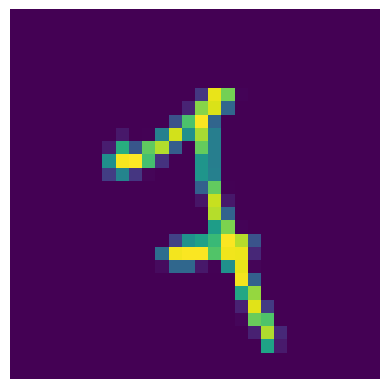

In [39]:
plot(x_test[1039])

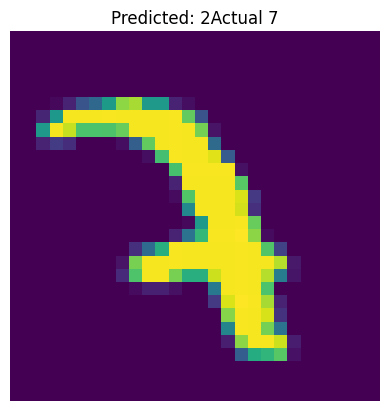

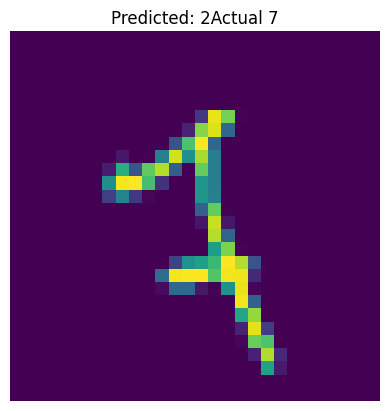

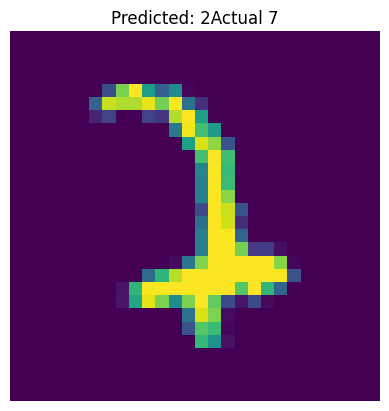

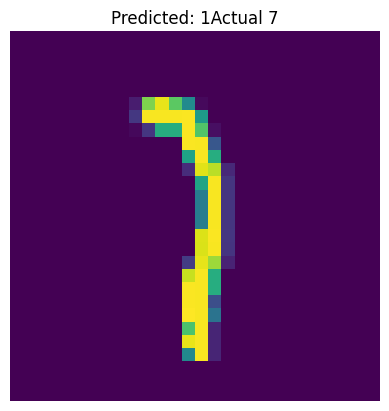

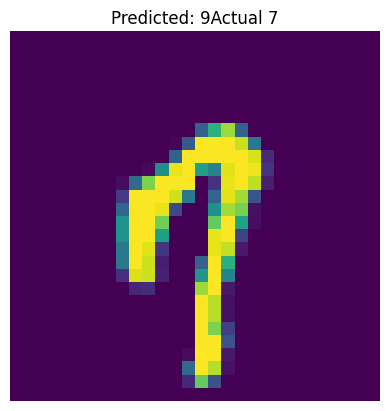

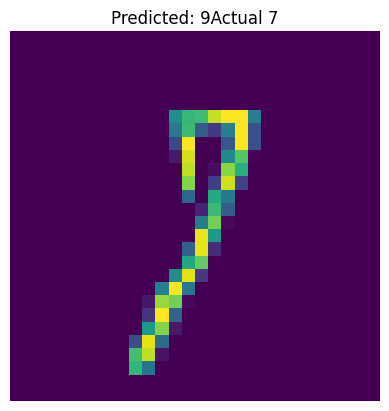

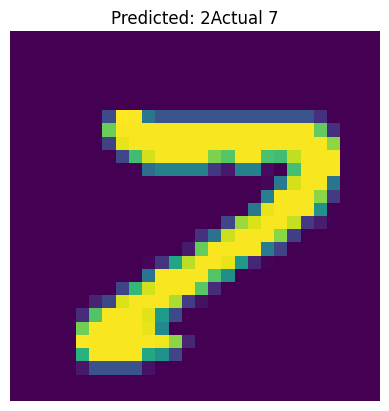

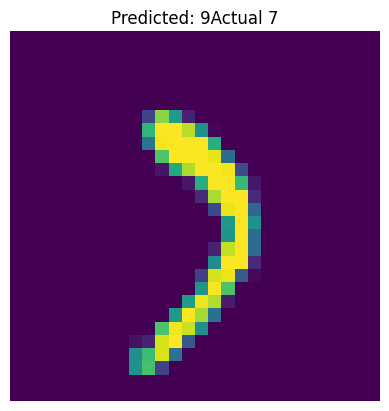

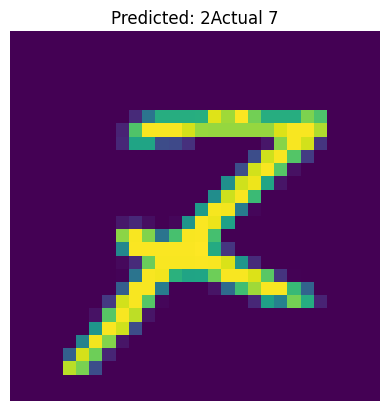

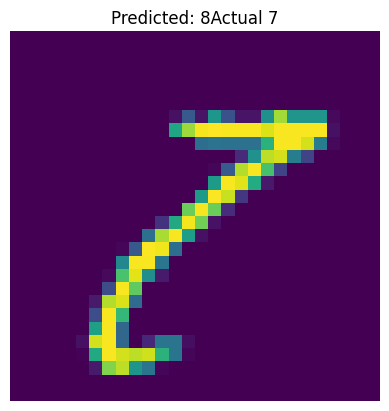

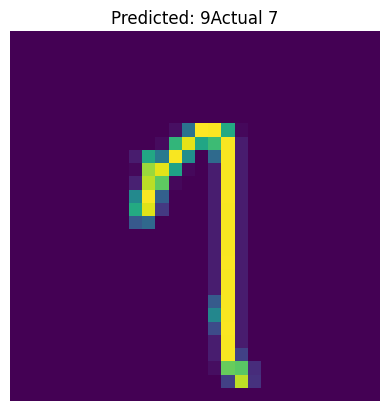

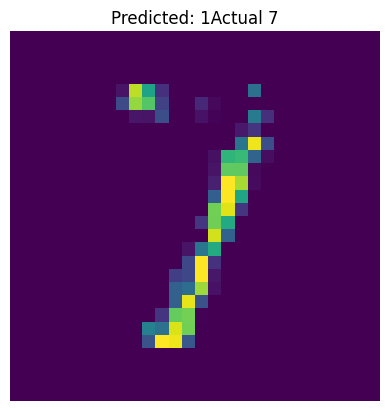

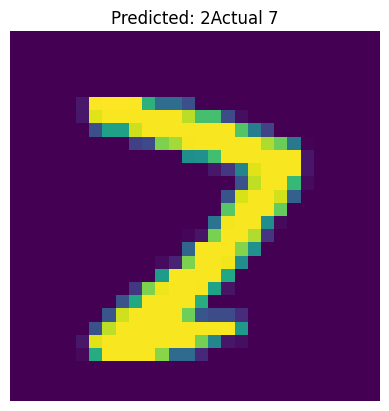

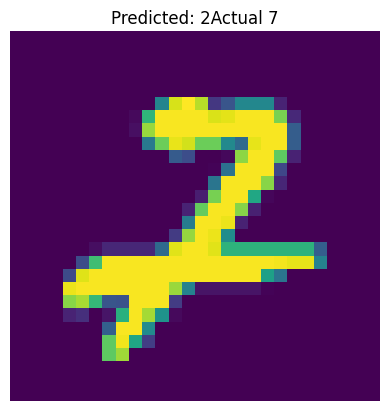

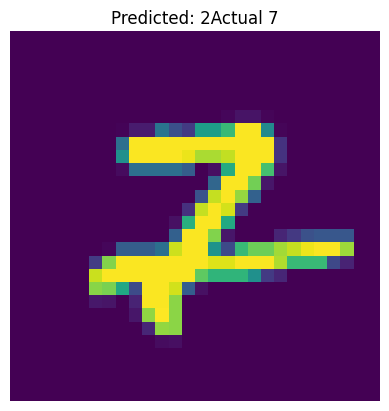

In [54]:

matrix[7]

for i in range(len(matrix[7])):
    plt.title('Predicted: '+str(np.argmax(prediction[matrix[7][i][1]])) +"Actual 7" )
    plt.imshow(x_test[matrix[7][i][1]])
    plt.axis('off')
    plt.show()


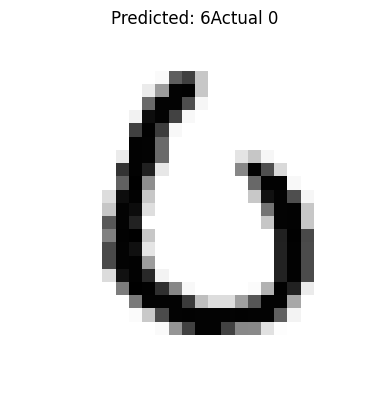

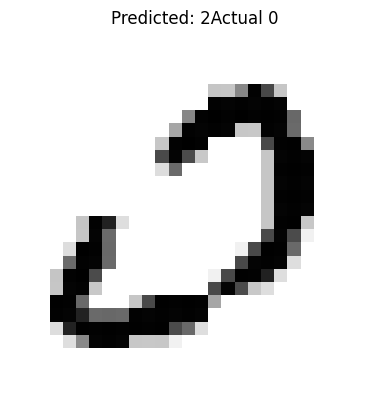

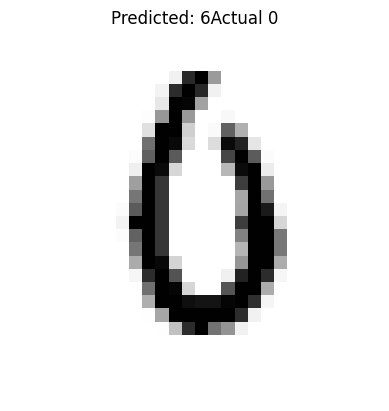

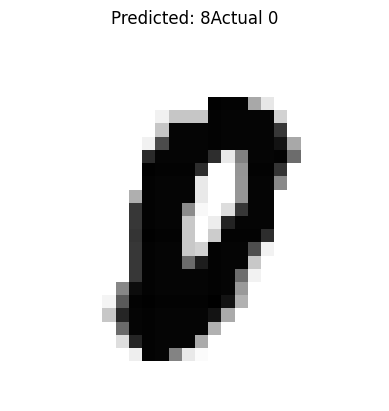

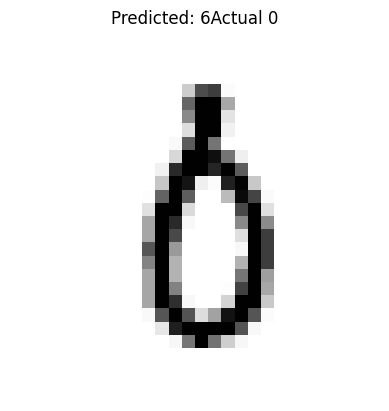

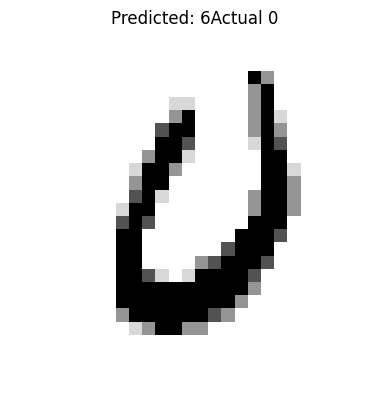

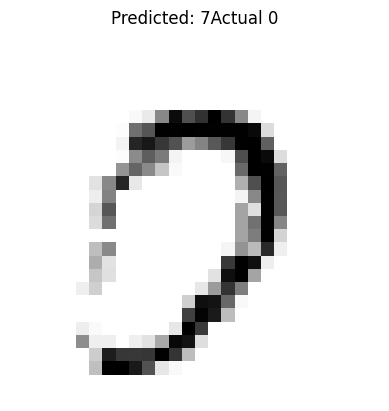

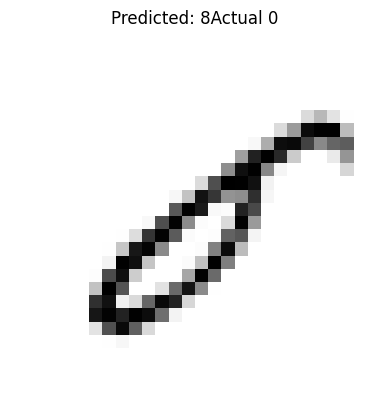

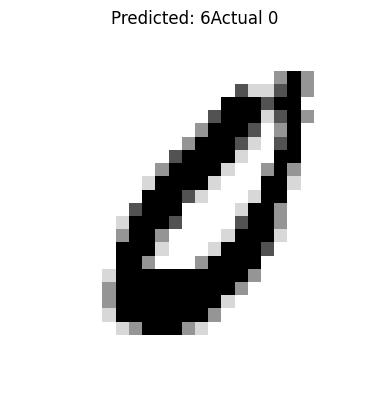

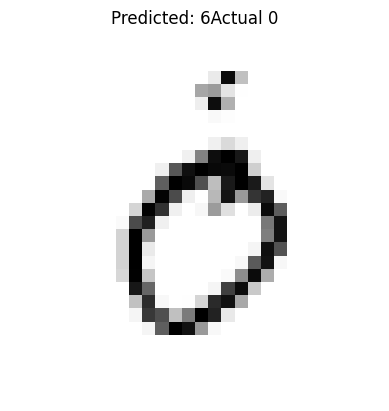

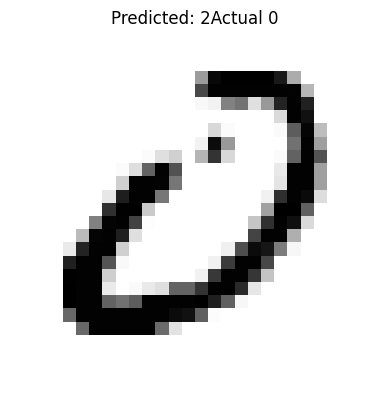

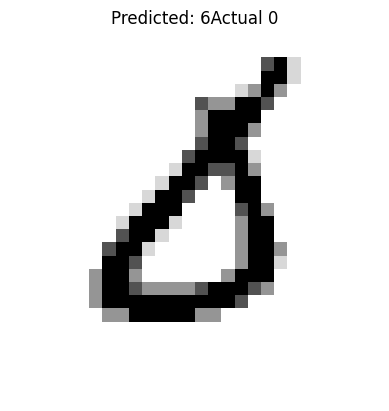

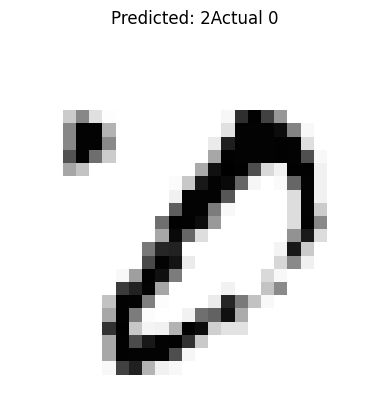

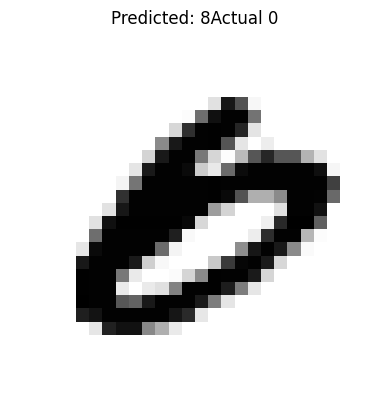

In [57]:

for i in range(len(matrix[0])):
    plt.set_cmap('Greys')
    plt.title('Predicted: '+str(np.argmax(prediction[matrix[0][i][1]])) +"Actual 0" )
    plt.imshow(x_test[matrix[0][i][1]])
    plt.axis('off')
    plt.show()


In [62]:
new_matrix={}
for i in range(10):
    new_matrix[i]=[]

In [78]:
def maxx_count(listt):
    maxx=0
    maxxitem=0
    for items in listt:
        if listt.count(items)>maxx:
            maxx=listt.count(items)
            maxxitem=items
    return maxxitem

In [ ]:
maxx_count

In [98]:
maxx_Fault=0
new=[]
for i in range(10):
    for j in range(len(matrix[i])):
        new.append((matrix[i][j][0]))

    new_matrix[i]=[f'item={maxx_count(new)}', f'times={new.count(maxx_count(new))}',f'ratio={100*new.count(maxx_count(new))/len(new)  }%']
    new=[]

        

    
    

In [84]:
maxx_count(list(new))

0

In [99]:
new_matrix

{0: ['item=6', 'times=7', 'ratio=50.0%'],
 1: ['item=6', 'times=4', 'ratio=50.0%'],
 2: ['item=7', 'times=4', 'ratio=66.66666666666667%'],
 3: ['item=8', 'times=3', 'ratio=30.0%'],
 4: ['item=9', 'times=6', 'ratio=60.0%'],
 5: ['item=6', 'times=4', 'ratio=40.0%'],
 6: ['item=1', 'times=2', 'ratio=40.0%'],
 7: ['item=2', 'times=8', 'ratio=53.333333333333336%'],
 8: ['item=2', 'times=3', 'ratio=37.5%'],
 9: ['item=4', 'times=8', 'ratio=57.142857142857146%']}

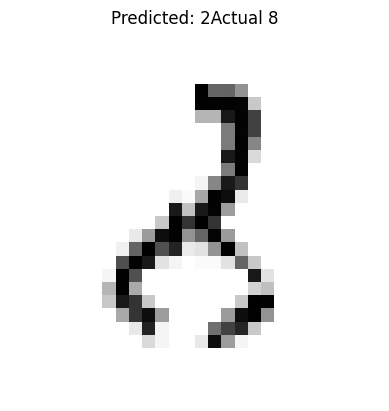

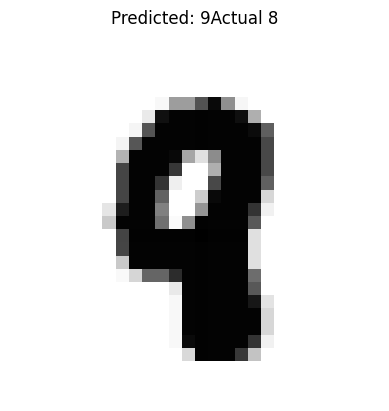

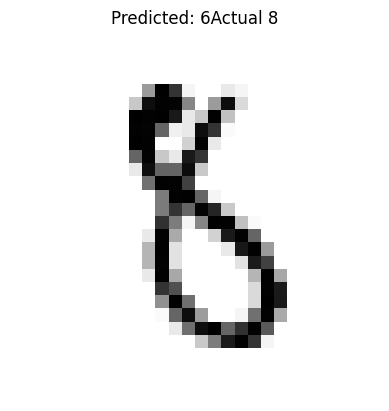

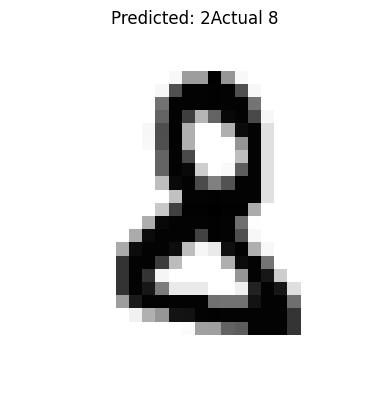

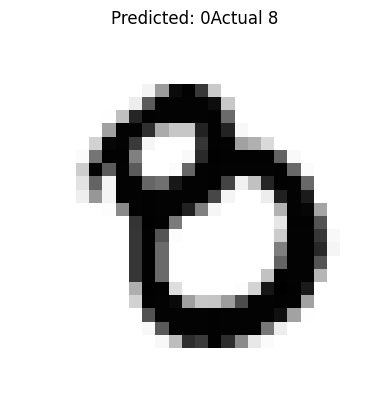

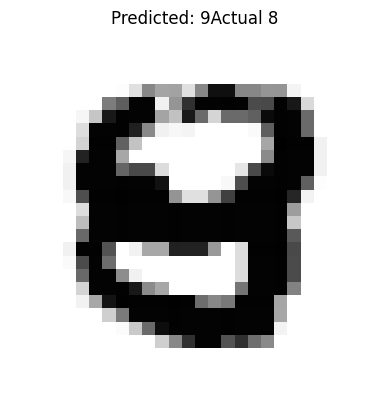

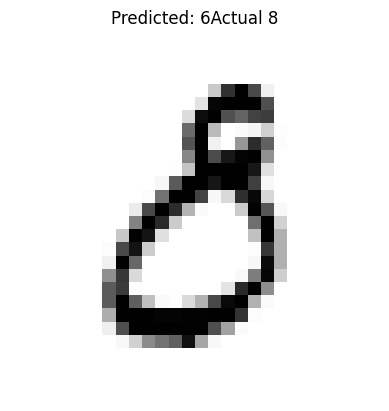

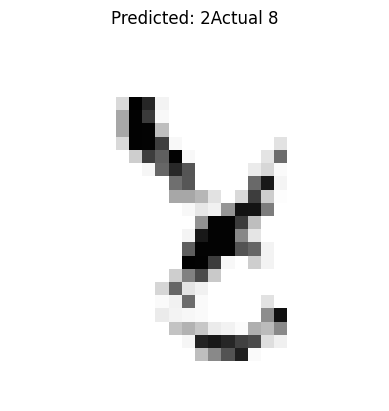

In [101]:

for i in range(len(matrix[8])):
    plt.set_cmap('Greys')
    plt.title('Predicted: '+str(np.argmax(prediction[matrix[8][i][1]])) +"Actual 8" )
    plt.imshow(x_test[matrix[8][i][1]])
    plt.axis('off')
    plt.show()